<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch09_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#스펙트럼 군집화

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabaz_score, \
    homogeneity_score, completeness_score, adjusted_rand_score
from sklearn.metrics.pairwise import pairwise_distances

In [0]:
# For reproducibility
np.random.seed(1000)


nb_samples = 1000 

In [0]:
def show_dataset(X):
    fig, ax = plt.subplots(1, 1, figsize=(8, 9))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

In [0]:
def show_clustered_dataset(X, km):
    fig, ax = plt.subplots(1, 1, figsize=(8, 9))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        c = km.predict(X[i].reshape(1, -1))
        if c == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

In [0]:
X, Y = make_moons(n_samples=nb_samples, noise=0.05)

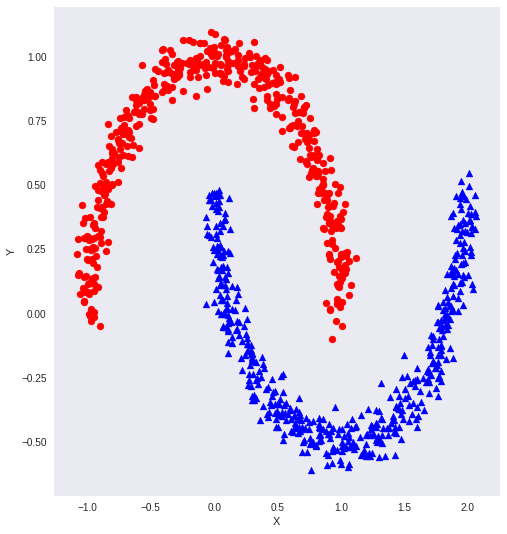

In [19]:
# Show dataset
show_dataset(X)

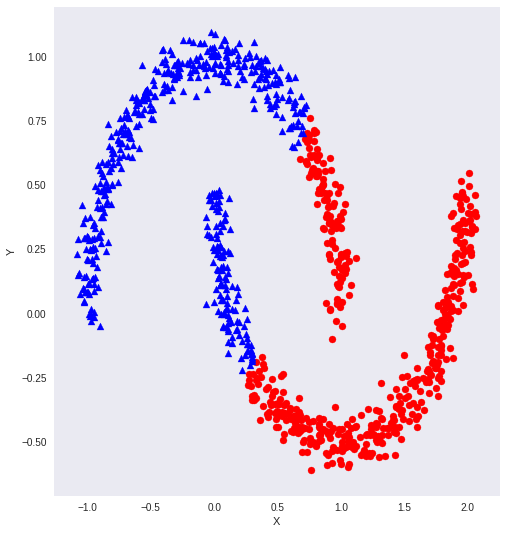

In [24]:
# Create and train K-Means
km = KMeans(n_clusters=2)
km.fit(X)

# Show clustered dataset
show_clustered_dataset(X, km)

In [0]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.1)
Y = dbs.fit_predict(X)

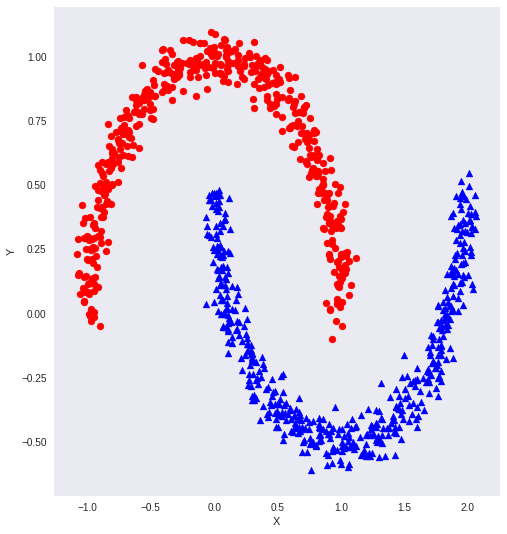

In [21]:
# Show dataset
show_dataset(X)

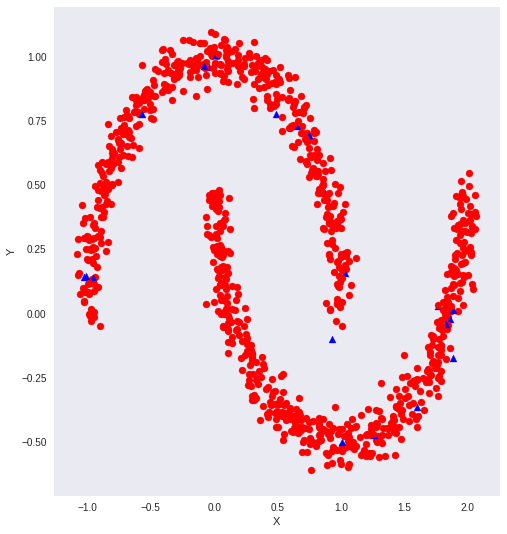

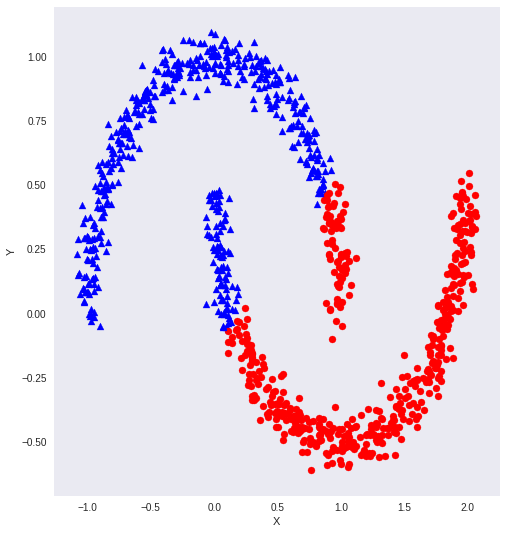

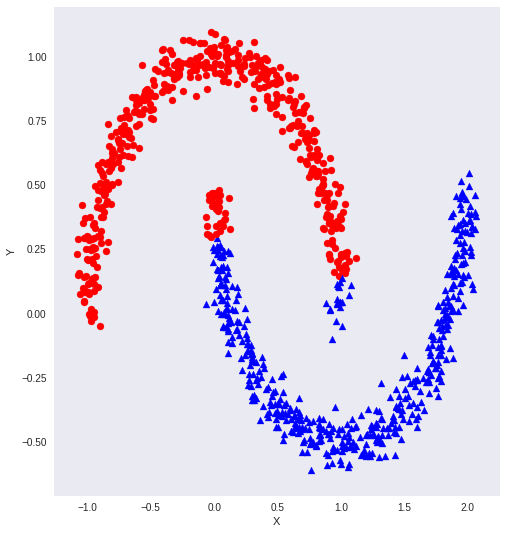

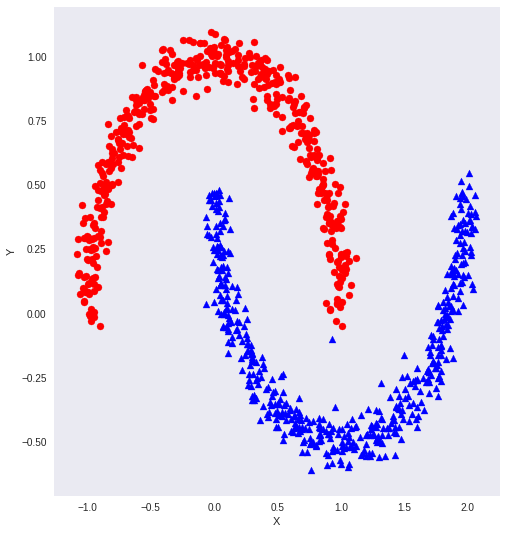

In [37]:
from sklearn.cluster import SpectralClustering
Yss = []
gammas = np.linspace(0, 12, 4)
for gamma in gammas:
  sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=gamma)
  Yss.append(sc.fit_predict(X))
  Y=sc.fit_predict(X)
  show_dataset(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


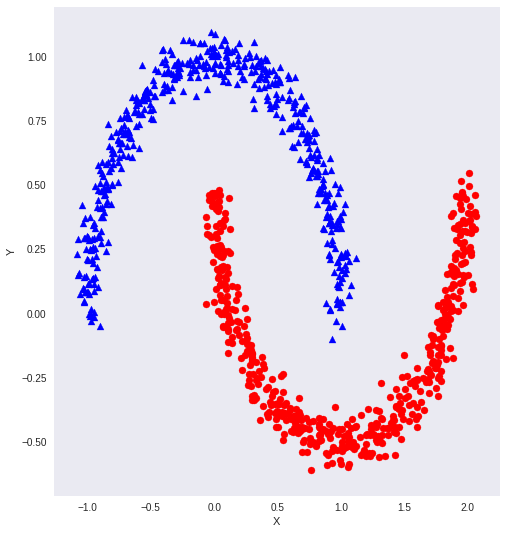

In [38]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
Y = sc.fit_predict(X)
show_dataset(X)